# Use Case : German Credit Risk

The link to the original dataset can be found below. .[Dataset](https://www.kaggle.com/uciml/german-credit)
<br>

* * * 

In [7]:
# Import the Package for Load the Data
import pandas as pd
import numpy as np

#### Import the Data

In [3]:
credit = pd.read_csv('german-credit-risk/german_credit_data.csv')
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [13]:
credit.shape

(1000, 9)

In [4]:
credit = credit.drop(['Unnamed: 0'],axis=1)
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [8]:
# Import the Package for Make the Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

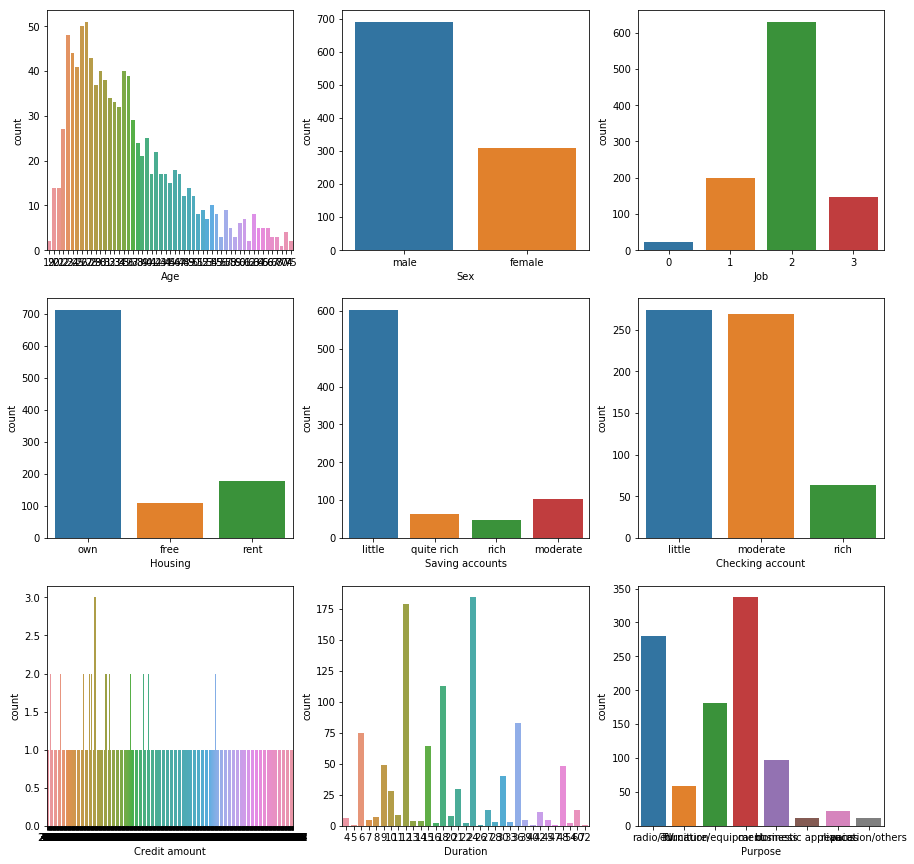

In [9]:
# Know the character every data from Bar Plot
f=plt.figure(figsize=(15,15))
f.add_subplot(3,3,1)
sns.countplot(credit['Age'])
f.add_subplot(3,3,2)
sns.countplot(credit['Sex'])
f.add_subplot(3,3,3)
sns.countplot(credit['Job'])
f.add_subplot(3,3,4)
sns.countplot(credit['Housing'])
f.add_subplot(3,3,5)
sns.countplot(credit['Saving accounts'])
f.add_subplot(3,3,6)
sns.countplot(credit['Checking account'])
f.add_subplot(3,3,7)
sns.countplot(credit['Credit amount'])
f.add_subplot(3,3,8)
sns.countplot(credit['Duration'])
f.add_subplot(3,3,9)
sns.countplot(credit['Purpose'])

From the **Bar Plot** we know that from 9 variable there are 3 numerical variable (Age, Credit Amount and Duration) and 6 categorical variable (Sex, Job, Housing, Saving Accounts, Checking Account and Purpose). 
<br>
<br>
If we see in *credit.info()*, Job variable is indicating as integer. So we need to convert job variable from integer type to object type  

In [23]:
credit['Job'] = credit.Job.astype(str)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


After we make sure that the data type is alredy 

### Missing Value Detection

In [15]:
#count how many missing values per field
df_null = credit.isnull().sum().sort_values(ascending = False).head(3)
df_null

Checking account    394
Saving accounts     183
Purpose               0
dtype: int64

In [16]:
# Detect the percentage of missing value (1000 is row of data)
print('% Missing value of Checking account =', round(df_null[0]/1000 * 100))
print('% Missing value of Saving accounts =', round(df_null[1]/1000 * 100))

% Missing value of Checking account = 39.0
% Missing value of Saving accounts = 18.0


Using missing valued detection, there are two variable that missing (*Checking account* and *Saving account*). The percentage of missing value is lower than 60%, so we can imputation the missing. Both of variable that missing is categorical, so we can impute using mode.

#### Separate data become numerical and categorical data

In [24]:
numerik = ['Age', 'Credit amount','Duration']
categorical = credit.drop(numerik, axis=1)
numerical = credit[numerik]

In [27]:
for cat in categorical :
    modus = categorical[cat].mode().values[0]
    categorical[cat] = categorical[cat].fillna(modus)
categorical.isnull().sum().sort_values(ascending = False)

Purpose             0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
dtype: int64

### Outlier Detection
We can the outlier for numerical data using box plot.

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns 

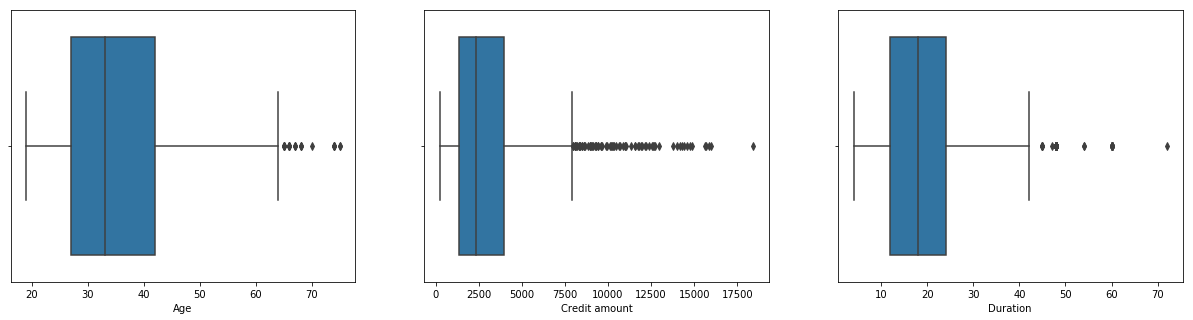

In [50]:
f = plt.figure(figsize=(21,5))
axes = 130
for num in numerical :
    axes += 1
    f.add_subplot(axes)
    sns.boxplot(data = numerical, x = num)
plt.show()

## Visualization

### Univariate Analysis

#### Bar Plot

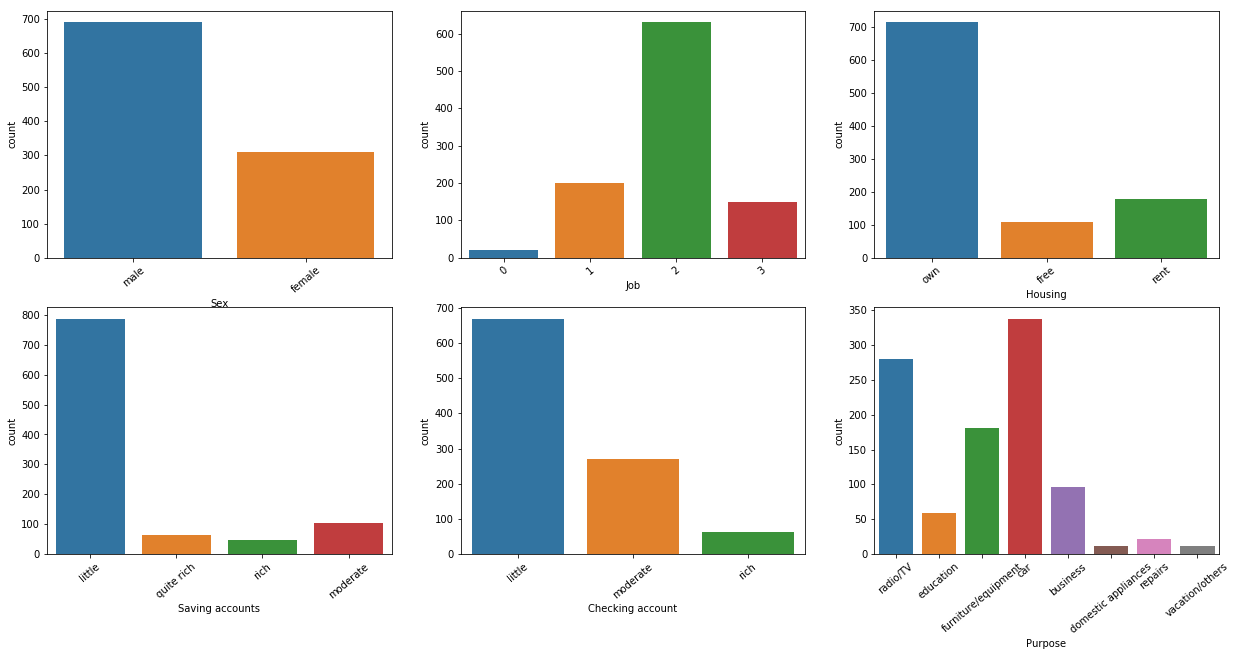

In [90]:
f = plt.figure(figsize=(21,10))
axes = 230
for num in categorical :
    axes += 1
    f.add_subplot(axes)
    sns.countplot(data = categorical, x = num)
    plt.xticks(rotation=40)
plt.show()

By using the visualization using the **Bar Plot**, it can be known to the number or * count * of each category in each category variable.

#### Pie Chart
To know the percentage of each category categorics data, we can use **Pie Chart**

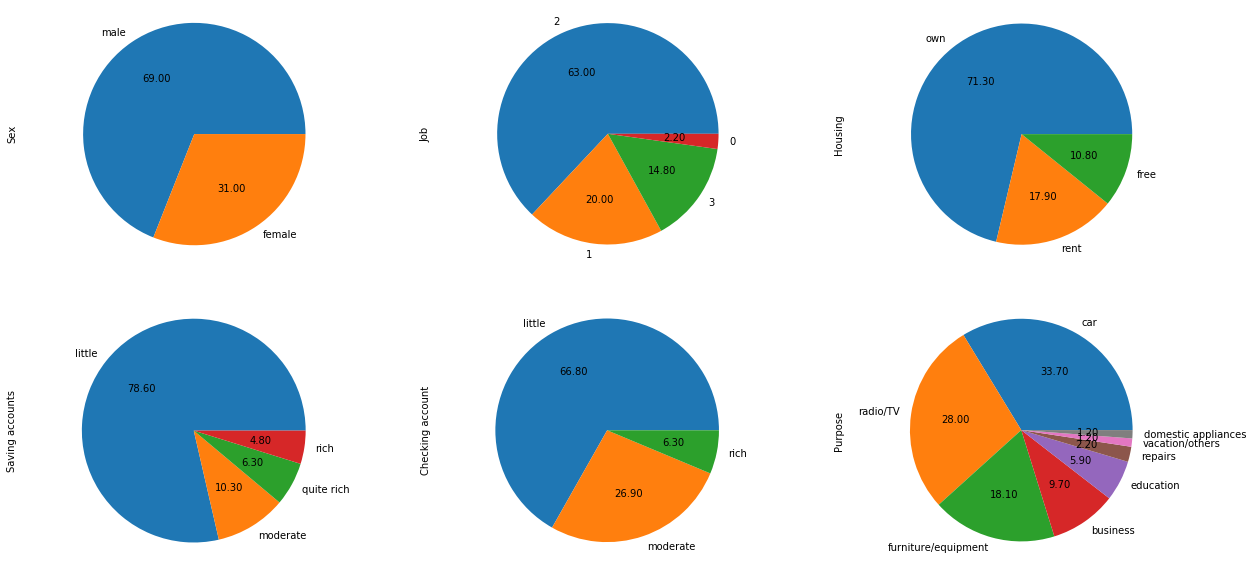

In [106]:
f = plt.figure(figsize=(21,10))
f.add_subplot(2,3,1)
categorical['Sex'].value_counts().plot.pie(autopct = '%.2f' )
plt.axis('equal')
f.add_subplot(2,3,2)
categorical['Job'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,3)
categorical['Housing'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,4)
categorical['Saving accounts'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,5)
categorical['Checking account'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
f.add_subplot(2,3,6)
categorical['Purpose'].value_counts().plot.pie(autopct = '%.2f' ) 
plt.axis('equal')
plt.show()

#### Distribution Plot 

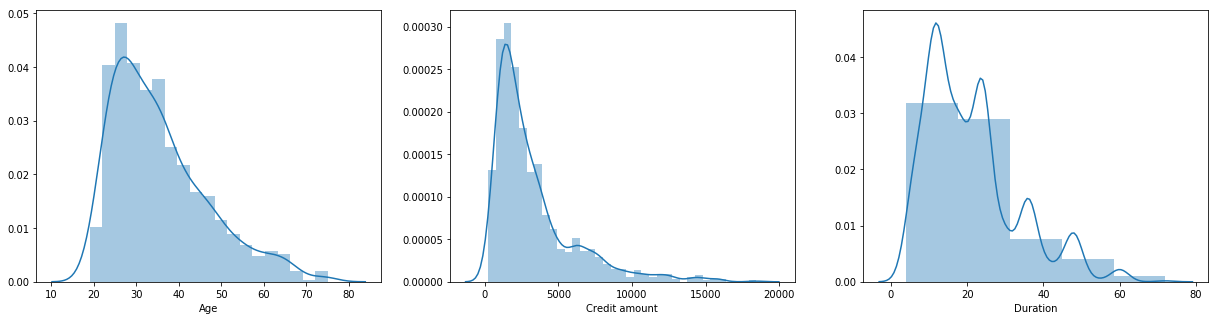

In [124]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.distplot(numerical['Age'])
f.add_subplot(1,3,2)
sns.distplot(numerical['Credit amount'])
f.add_subplot(1,3,3)
sns.distplot(numerical['Duration'], bins = 5)
plt.show()

Menggunakan **Distribution Plot** dapat diketahui distribusi dari setiap variabel numerik. Dapat diketahui dari ke-tiga variabel numerik bahwa memiliki pola *positive skewness*. Hal teresebut diduga dipengaruhi oleh banyaknya data yang outlier. Untuk melihat distribusi data dengan mengetahui pemusatan dari data, dapat divisualisaikan menggunakan **Violin Plot** berikut.

#### Violin PLot

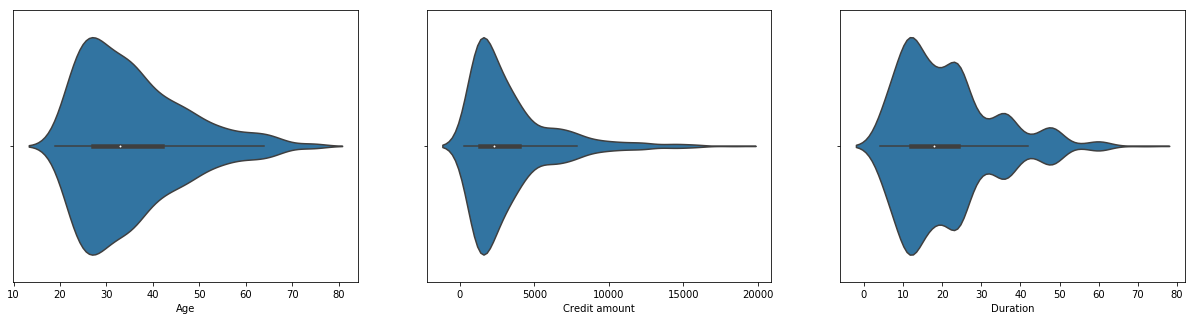

In [125]:
f=plt.figure(figsize=(21,5))
f.add_subplot(1,3,1)
sns.violinplot(numerical['Age'])
f.add_subplot(1,3,2)
sns.violinplot(numerical['Credit amount'])
f.add_subplot(1,3,3)
sns.violinplot(numerical['Duration'], bins = 5)
plt.show()

### Multivariate Analysis

#### Correlation Plot

In [65]:
data = pd.concat([numerical, categorical], axis = 1)
data.head()

,Age,Credit amount,Duration,Sex,Job,Housing,Saving accounts,Checking account,Purpose
0,67,1169,6,male,2,own,little,little,radio/TV
1,22,5951,48,female,2,own,little,moderate,radio/TV
2,49,2096,12,male,1,own,little,little,education
3,45,7882,42,male,2,free,little,little,furniture/equipment
4,53,4870,24,male,2,free,little,little,car


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null object
Housing             1000 non-null object
Saving accounts     1000 non-null object
Checking account    1000 non-null object
Purpose             1000 non-null object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


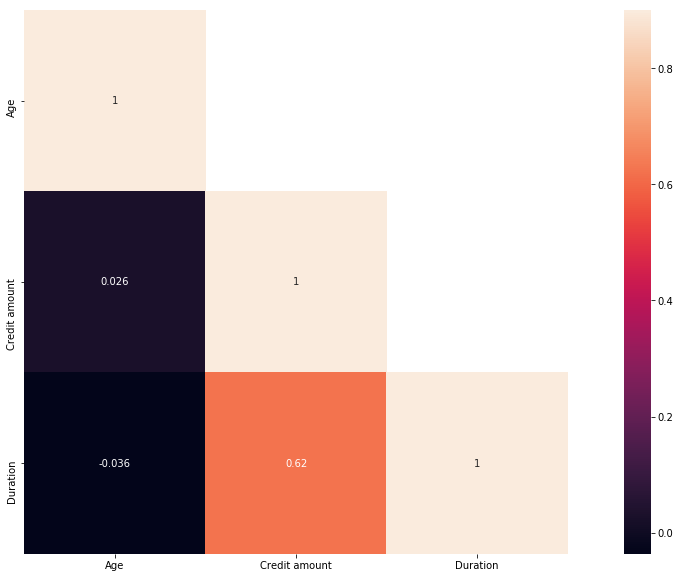

In [70]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

plt.figure(figsize=(5,5))
#create correlation
corr = data.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)
plt.show()

Based on **Correlation Plot**, it can be seen that the correlation between *Duration* and *Credit Amount* has the highest correlation with a correlation value of 0.62. Meanwhile, if you see the correlation between *Duration* and *Age*, it can be seen to have a negative correlation with a correlation value of 0.03. While the correlation value *Age* and *Credit amount* has the smallest correlation value when compared with correlations between other numerical variables.

#### Scatter Plot
Bassed on Correlation Plot, we can know patterns between variables using **Scatter Plot**.

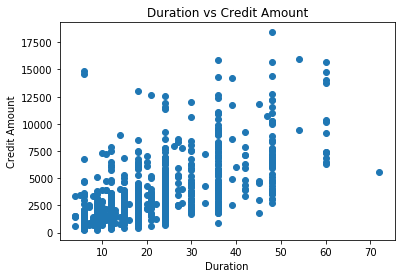

In [73]:
plt.scatter(x=data['Duration'],y=data['Credit amount'])
plt.title('Duration vs Credit Amount')
plt.xlabel('Duration')
plt.ylabel('Credit Amount')
plt.show()

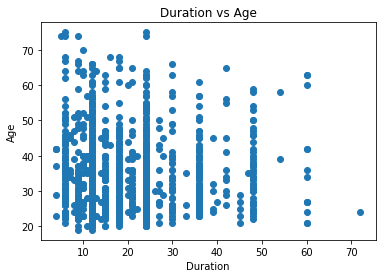

In [75]:
plt.scatter(x=data['Duration'],y=data['Age'])
plt.title('Duration vs Age')
plt.xlabel('Duration')
plt.ylabel('Age')
plt.show()

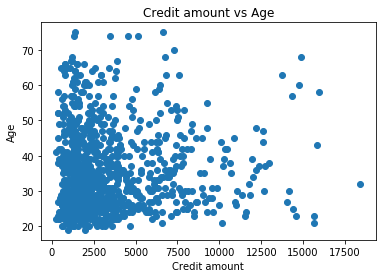

In [77]:
plt.scatter(x=data['Credit amount'],y=data['Age'])
plt.title('Credit amount vs Age')
plt.xlabel('Credit amount')
plt.ylabel('Age')
plt.show()

#### Pair Plot

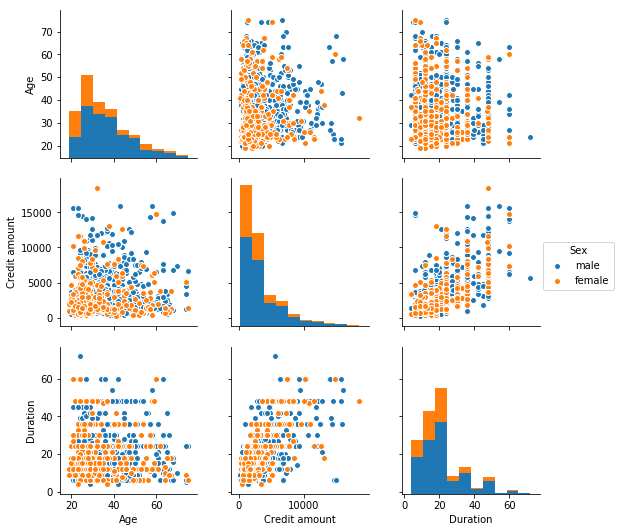

In [114]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Sex"]], hue="Sex", diag_kind="hist")
plt.show()

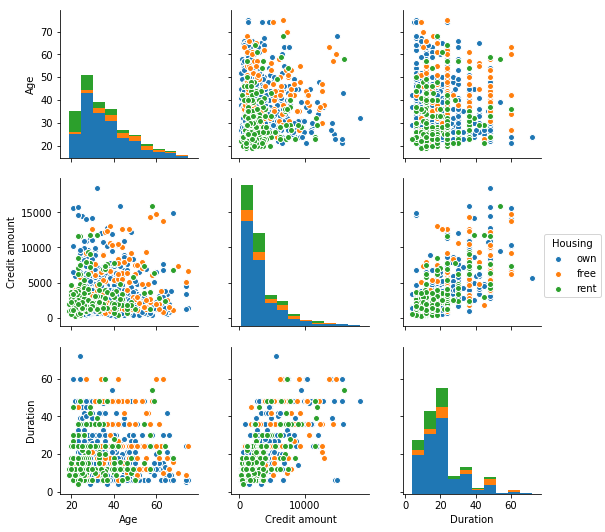

In [118]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Housing"]], hue="Housing", diag_kind="hist")
plt.show()

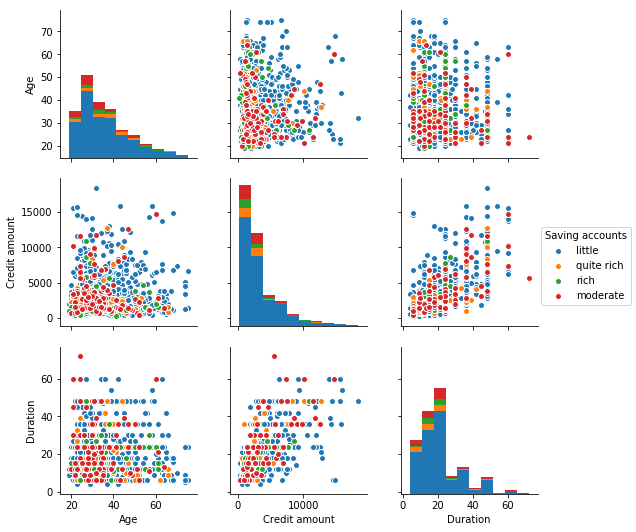

In [119]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Saving accounts"]], hue="Saving accounts", diag_kind="hist")
plt.show()

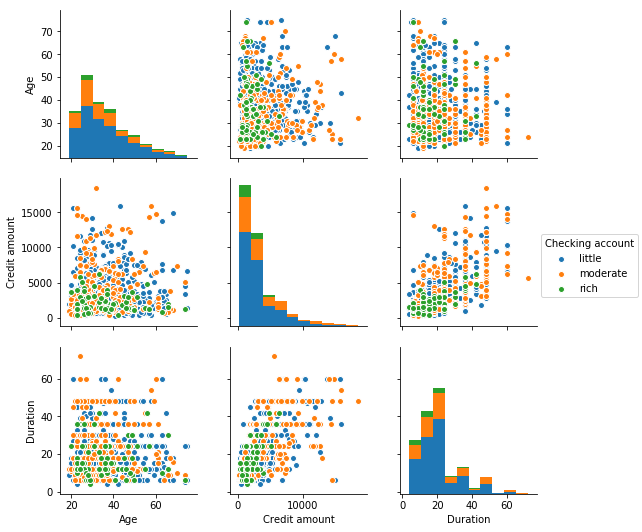

In [120]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Checking account"]], hue="Checking account", diag_kind="hist")
plt.show()

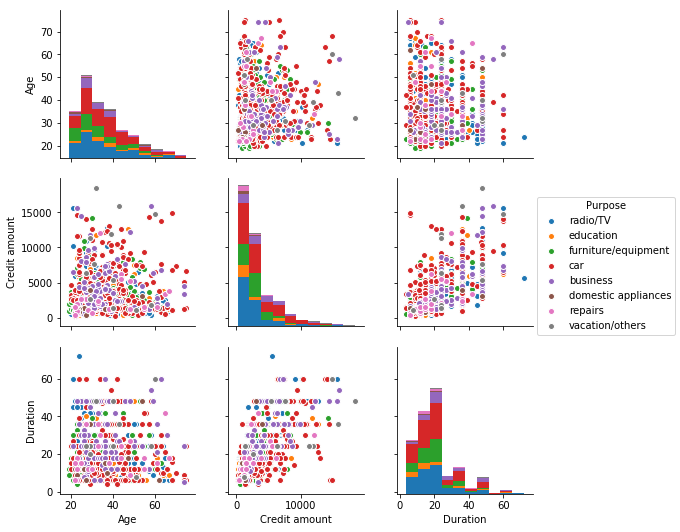

In [121]:
sns.pairplot(data[["Age", "Credit amount", "Duration", "Purpose"]], hue="Purpose", diag_kind="hist")
plt.show()

### Insight
The data consist of 1000 row with 9 variabel.Dataset represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The majority who takes a credit are male that have job "2", having a own house, saving and checking account is little than the majority purpose they use credits is for car. 
<br>
<br>
Based on all Pair Plot we know that all numerical data is spread out and not centered on specific category. Based on correlation we know that if  when the duration increases the credit also increases.

1. Maximum credit amount with purpose

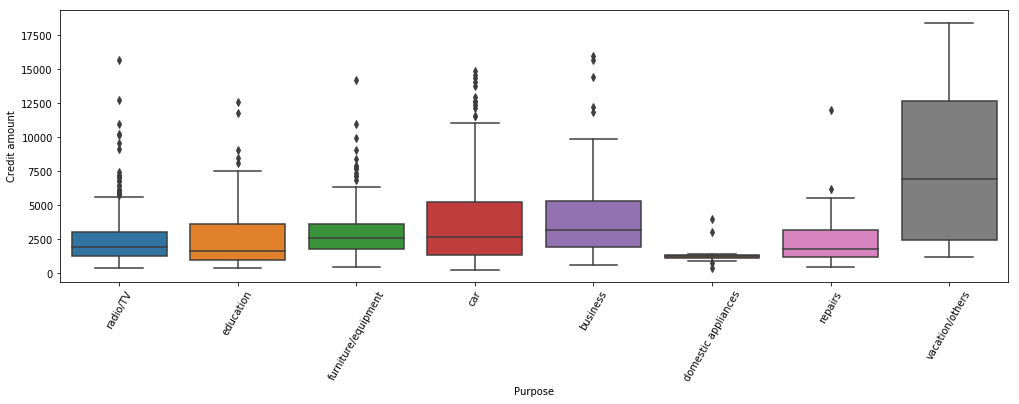

In [133]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,1,1)
sns.boxplot(y=data["Credit amount"], x=data['Purpose'])
plt.xticks(rotation=60)
plt.show()

In [134]:
df_car = (data[data.Purpose == 'car'])
df_car.sort_values(by=['Credit amount'], ascending=False).head(3)[['Credit amount']]

,Credit amount
917,14896
236,14555
378,14318


In [135]:
df_car = (data[data.Purpose == 'vacation/others'])
df_car.sort_values(by=['Credit amount'], ascending=False).head(3)[['Credit amount']]

,Credit amount
915,18424
818,15857
374,14782


Based on Purpose Bar Plot, we know that the majority person purpose have credits is for car. When we see Box Plot Credit Amount categorize with purpose, the highest credit amount is for  vocation/other. So we can say that vven though the majority of credit card users are to buy a car, the highest Credit Amount is for vocation / others.